<a href="https://colab.research.google.com/github/fadi-theodory/Machine-learning/blob/main/(Core)_Project_3_Part_1_Chicago_crimes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Core) Project 3 - Part 1


**Chicago Crime Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pytz
import os
import statsmodels.tsa.api as tsa

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
from matplotlib import ticker
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)


In [ ]:
import glob


In [ ]:
import pandas as pd
folder = "/content/drive/MyDrive/AXSOSACADEMY/04-Time Series/Week14/Data/Chicago data/"
crime_files = sorted(glob.glob(folder+"*.csv"))
crime_files

['/content/drive/MyDrive/AXSOSACADEMY/04-Time Series/Week14/Data/Chicago data/Chicago-Crime_2001.csv',
 '/content/drive/MyDrive/AXSOSACADEMY/04-Time Series/Week14/Data/Chicago data/Chicago-Crime_2002.csv',
 '/content/drive/MyDrive/AXSOSACADEMY/04-Time Series/Week14/Data/Chicago data/Chicago-Crime_2003.csv',
 '/content/drive/MyDrive/AXSOSACADEMY/04-Time Series/Week14/Data/Chicago data/Chicago-Crime_2004.csv',
 '/content/drive/MyDrive/AXSOSACADEMY/04-Time Series/Week14/Data/Chicago data/Chicago-Crime_2005.csv',
 '/content/drive/MyDrive/AXSOSACADEMY/04-Time Series/Week14/Data/Chicago data/Chicago-Crime_2006.csv',
 '/content/drive/MyDrive/AXSOSACADEMY/04-Time Series/Week14/Data/Chicago data/Chicago-Crime_2007.csv',
 '/content/drive/MyDrive/AXSOSACADEMY/04-Time Series/Week14/Data/Chicago data/Chicago-Crime_2008.csv',
 '/content/drive/MyDrive/AXSOSACADEMY/04-Time Series/Week14/Data/Chicago data/Chicago-Crime_2009.csv',
 '/content/drive/MyDrive/AXSOSACADEMY/04-Time Series/Week14/Data/Chicago 

In [ ]:
df = pd.concat([pd.read_csv(f) for f in crime_files])

In [ ]:
df.head()

ID                    Date     Primary Type          Description  \
0  1326041  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   
1  1319931  01/01/2001 01:00:00 PM          BATTERY               SIMPLE   
2  1324743  01/01/2001 01:00:00 PM         GAMBLING  ILLEGAL ILL LOTTERY   
3  1310717  01/01/2001 01:00:00 AM  CRIMINAL DAMAGE           TO VEHICLE   
4  1318099  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   

      Location Description  Arrest  Domestic  Beat  District  Ward   Latitude  \
0                RESIDENCE   False     False  1624      16.0   NaN  41.957850   
1                RESIDENCE   False      True   825       8.0   NaN  41.783892   
2                   STREET    True     False   313       3.0   NaN  41.780412   
3                   STREET   False     False  2424      24.0   NaN  42.012391   
4  RESIDENCE PORCH/HALLWAY   False      True   214       2.0   NaN  41.819538   

   Longitude  
0 -87.749185  
1 -87.684841  
2 -87.611970  
3 -87.678032  
4 -87.620020

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# to count value of primary type, sort them alphabetacally
df['Primary Type'].value_counts().sort_index()


Primary Type
ARSON                                  13121
ASSAULT                               501103
BATTERY                              1410889
BURGLARY                              422246
CONCEALED CARRY LICENSE VIOLATION       1019
CRIM SEXUAL ASSAULT                    27584
CRIMINAL DAMAGE                       878914
CRIMINAL SEXUAL ASSAULT                 6353
CRIMINAL TRESPASS                     212869
DECEPTIVE PRACTICE                    340958
DOMESTIC VIOLENCE                          1
GAMBLING                               14616
HOMICIDE                               12394
HUMAN TRAFFICKING                         96
INTERFERENCE WITH PUBLIC OFFICER       18206
INTIMIDATION                            4595
KIDNAPPING                              7185
LIQUOR LAW VIOLATION                   14846
MOTOR VEHICLE THEFT                   366586
NARCOTICS                             746155
NON - CRIMINAL                            38
NON-CRIMINAL                             181
NON-CRIMINAL (SUBJECT SPECIFIED)           9
OBSCENITY                                810
OFFENSE INVOLVING CHILDREN             55280
OTHER NARCOTIC VIOLATION                 147
OTHER OFFENSE                         479174
PROSTITUTION                           69750
PUBLIC INDECENCY                         193
PUBLIC PEACE VIOLATION                 52086
RITUALISM                                 24
ROBBERY                               289677
SEX OFFENSE                            30442
STALKING                                4664
THEFT                                1626992
WEAPONS VIOLATION                     103906
Name: count, dtype: int64

In [ ]:
# to change CRIM SEXUAL ASSAULT to CRIMINAL SEXUAL ASSAULT, NON - CRIMINAL and NON-CRIMINAL (SUBJECT SPECIFIED)to NON-CRIMINAL
df['Primary Type'] = df['Primary Type'].replace({'CRIM SEXUAL ASSAULT':'CRIMINAL SEXUAL ASSAULT',
                                                  'NON - CRIMINAL':'NON-CRIMINAL',
                                                  'NON-CRIMINAL (SUBJECT SPECIFIED)':'NON-CRIMINAL'})

In [ ]:
df.isna().sum().sum()

np.int64(803191)

In [ ]:
# to remove Latitude, Longitude, ID
df = df.drop(columns=['Latitude', 'Longitude', 'ID'])

In [ ]:
df.head()

Date     Primary Type          Description  \
0  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   
1  01/01/2001 01:00:00 PM          BATTERY               SIMPLE   
2  01/01/2001 01:00:00 PM         GAMBLING  ILLEGAL ILL LOTTERY   
3  01/01/2001 01:00:00 AM  CRIMINAL DAMAGE           TO VEHICLE   
4  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   

      Location Description  Arrest  Domestic  Beat  District  Ward  
0                RESIDENCE   False     False  1624      16.0   NaN  
1                RESIDENCE   False      True   825       8.0   NaN  
2                   STREET    True     False   313       3.0   NaN  
3                   STREET   False     False  2424      24.0   NaN  
4  RESIDENCE PORCH/HALLWAY   False      True   214       2.0   NaN

In [ ]:
# to change column date to datetime type
df['Datetime'] = pd.to_datetime(df['Date'])
# to set Datetime as index
df = df.set_index('Datetime')


## Topic 1) Comparing Police Districts


In [ ]:
# to filter data on year 2022
df_22= df.loc['2022']

df_22

Date        Primary Type  \
Datetime                                                          
2022-01-01 13:00:00  01/01/2022 01:00:00 PM               THEFT   
2022-01-01 13:00:00  01/01/2022 01:00:00 PM  DECEPTIVE PRACTICE   
2022-01-01 01:00:00  01/01/2022 01:00:00 AM     CRIMINAL DAMAGE   
2022-01-01 01:00:00  01/01/2022 01:00:00 AM       OTHER OFFENSE   
2022-01-01 01:00:00  01/01/2022 01:00:00 AM               THEFT   
...                                     ...                 ...   
2022-12-31 12:50:00  12/31/2022 12:50:00 PM             ASSAULT   
2022-12-31 12:50:00  12/31/2022 12:50:00 PM             ASSAULT   
2022-12-31 00:52:00  12/31/2022 12:52:00 AM             BATTERY   
2022-12-31 12:52:00  12/31/2022 12:52:00 PM             ASSAULT   
2022-12-31 12:59:00  12/31/2022 12:59:00 PM  DECEPTIVE PRACTICE   

                                                 Description  \
Datetime                                                       
2022-01-01 13:00:00                           $500 AND UNDER   
2022-01-01 13:00:00  FINANCIAL IDENTITY THEFT $300 AND UNDER   
2022-01-01 01:00:00                               TO VEHICLE   
2022-01-01 01:00:00                  HARASSMENT BY TELEPHONE   
2022-01-01 01:00:00                           $500 AND UNDER   
...                                                      ...   
2022-12-31 12:50:00                                   SIMPLE   
2022-12-31 12:50:00                     AGGRAVATED - HANDGUN   
2022-12-31 00:52:00                                   SIMPLE   
2022-12-31 12:52:00                                   SIMPLE   
2022-12-31 12:59:00  FINANCIAL IDENTITY THEFT $300 AND UNDER   

                                       Location Description  Arrest  Domestic  \
Datetime                                                                        
2022-01-01 13:00:00                              RESTAURANT   False     False   
2022-01-01 13:00:00                                    BANK   False     False   
2022-01-01 01:00:00  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False   
2022-01-01 01:00:00                               APARTMENT   False     False   
2022-01-01 01:00:00                         OTHER (SPECIFY)   False     False   
...                                                     ...     ...       ...   
2022-12-31 12:50:00                               APARTMENT   False     False   
2022-12-31 12:50:00                               APARTMENT   False      True   
2022-12-31 00:52:00                              BARBERSHOP   False     False   
2022-12-31 12:52:00            COMMERCIAL / BUSINESS OFFICE   False     False   
2022-12-31 12:59:00                               RESIDENCE   False     False   

                     Beat  District  Ward  
Datetime                                   
2022-01-01 13:00:00   121       1.0  42.0  
2022-01-01 13:00:00   811       8.0  23.0  
2022-01-01 01:00:00   531       5.0   9.0  
2022-01-01 01:00:00   412       4.0   8.0  
2022-01-01 01:00:00  1811      18.0   2.0  
...                   ...       ...   ...  
2022-12-31 12:50:00  1014      10.0  24.0  
2022-12-31 12:50:00   733       7.0   6.0  
2022-12-31 00:52:00  1135      11.0  28.0  
2022-12-31 12:52:00  1432      14.0  32.0  
2022-12-31 12:59:00  1511      15.0  29.0  

[238858 rows x 9 columns]

In [ ]:
# to group by district, resample for annually by sum
crimes_by_dist = df_22.groupby("District")['Primary Type'].value_counts(normalize=False)
crimes_by_dist


District  Primary Type       
1.0       THEFT                  5005
          BATTERY                1773
          DECEPTIVE PRACTICE     1110
          MOTOR VEHICLE THEFT    1081
          CRIMINAL DAMAGE        1078
                                 ... 
31.0      BATTERY                   1
          CRIMINAL DAMAGE           1
          CRIMINAL TRESPASS         1
          OTHER OFFENSE             1
          ROBBERY                   1
Name: count, Length: 593, dtype: int64

In [ ]:
crimes_by_dist = df_22['District'].value_counts()
crimes_by_dist

District
8.0     14805
6.0     14694
12.0    14341
4.0     13931
11.0    13457
1.0     13044
18.0    12429
19.0    12243
25.0    11951
3.0     11937
2.0     11793
9.0     10376
7.0     10319
10.0     9961
5.0      9773
16.0     9226
24.0     8469
15.0     8308
14.0     8158
22.0     7671
17.0     6997
20.0     4960
31.0       15
Name: count, dtype: int64

Text(0.5, 0, 'District')

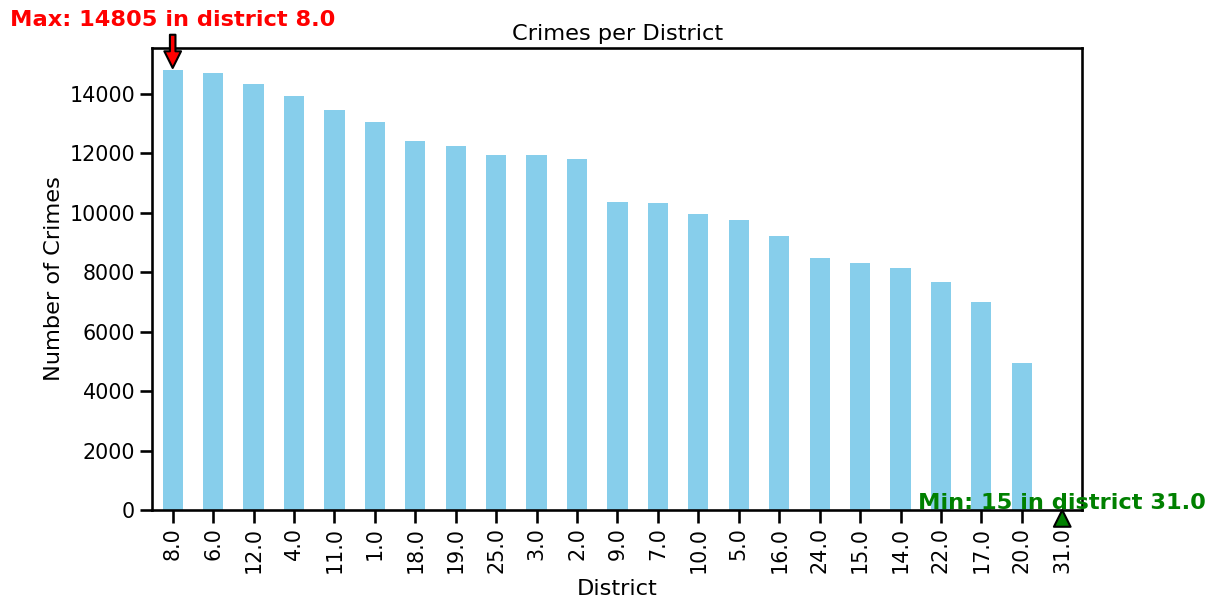

In [ ]:
# Bar plot for crimes per district
ax =crimes_by_dist.plot(kind='bar', figsize=(12,6), title="Crimes per District",color = "Skyblue")
#to annotate the number of max crimes over
max_district = crimes_by_dist.idxmax()
max_value = crimes_by_dist.max()

min_district = crimes_by_dist.idxmin()
min_value = crimes_by_dist.min()

# Annotate the max value
ax.annotate(f'Max: {max_value} in district {max_district}',
            xy=(crimes_by_dist.index.get_loc(max_district), max_value),
            xytext=(crimes_by_dist.index.get_loc(max_district), max_value + max_value*0.1),
            arrowprops=dict(facecolor='red', shrink=0.05),
            ha='center', color='red', fontweight='bold')

# Annotate min with an arrow
ax.annotate(f'Min: {min_value} in district {min_district}',
            xy=(crimes_by_dist.index.get_loc(min_district), min_value),
            xytext=(crimes_by_dist.index.get_loc(min_district), min_value + min_value*0.2),
            arrowprops=dict(facecolor='green', shrink=0.15),
            ha='center', color='green', fontweight='bold')

# Add labels and title
ax.set_ylabel('Number of Crimes')
ax.set_xlabel('District')

In [ ]:
# to print the district with highest number and the lowest number
print(f"The district with the highest number of crimes is district {max_district} with {max_value} crimes.")
print(f"The district with the lowest number of crimes is district {min_district} with {min_value} crimes.")

The district with the highest number of crimes is district 8.0 with 14805 crimes.
The district with the lowest number of crimes is district 31.0 with 15 crimes.


---
---

## Topic 2) Crimes Across the Years:



Is the total number of crimes increasing or decreasing across the years?



In [ ]:
## Get # of crimes by year
crimes_by_year = df.groupby(df.index.year)['Primary Type'].value_counts().sort_index()
crimes_by_year


Datetime  Primary Type                     
2001      ARSON                                 1011
          ASSAULT                              31384
          BATTERY                              93461
          BURGLARY                             26014
          CONCEALED CARRY LICENSE VIOLATION        1
                                               ...  
2022      ROBBERY                               8965
          SEX OFFENSE                           1225
          STALKING                               446
          THEFT                                54820
          WEAPONS VIOLATION                     8766
Name: count, Length: 660, dtype: int64

In [ ]:
## convert to dataframe and reset_index()
plot_df = crimes_by_year.to_frame('# of Crimes').reset_index()
plot_df


Datetime                       Primary Type  # of Crimes
0        2001                              ARSON         1011
1        2001                            ASSAULT        31384
2        2001                            BATTERY        93461
3        2001                           BURGLARY        26014
4        2001  CONCEALED CARRY LICENSE VIOLATION            1
..        ...                                ...          ...
655      2022                            ROBBERY         8965
656      2022                        SEX OFFENSE         1225
657      2022                           STALKING          446
658      2022                              THEFT        54820
659      2022                  WEAPONS VIOLATION         8766

[660 rows x 3 columns]

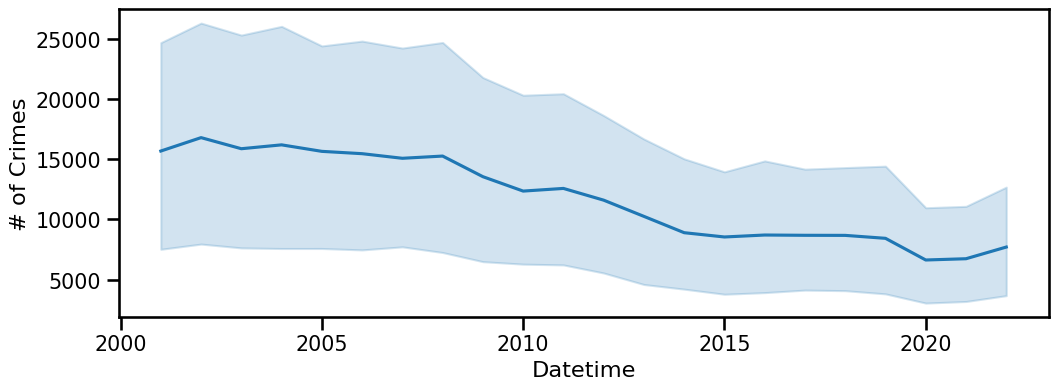

In [ ]:
ax = sns.lineplot(data=plot_df, x='Datetime',y='# of Crimes')

we can see that the total number of crimes is decreasing over the years. However, the lowest was 2020. then it started to increase, to reach around the number of crimes in 2015

Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


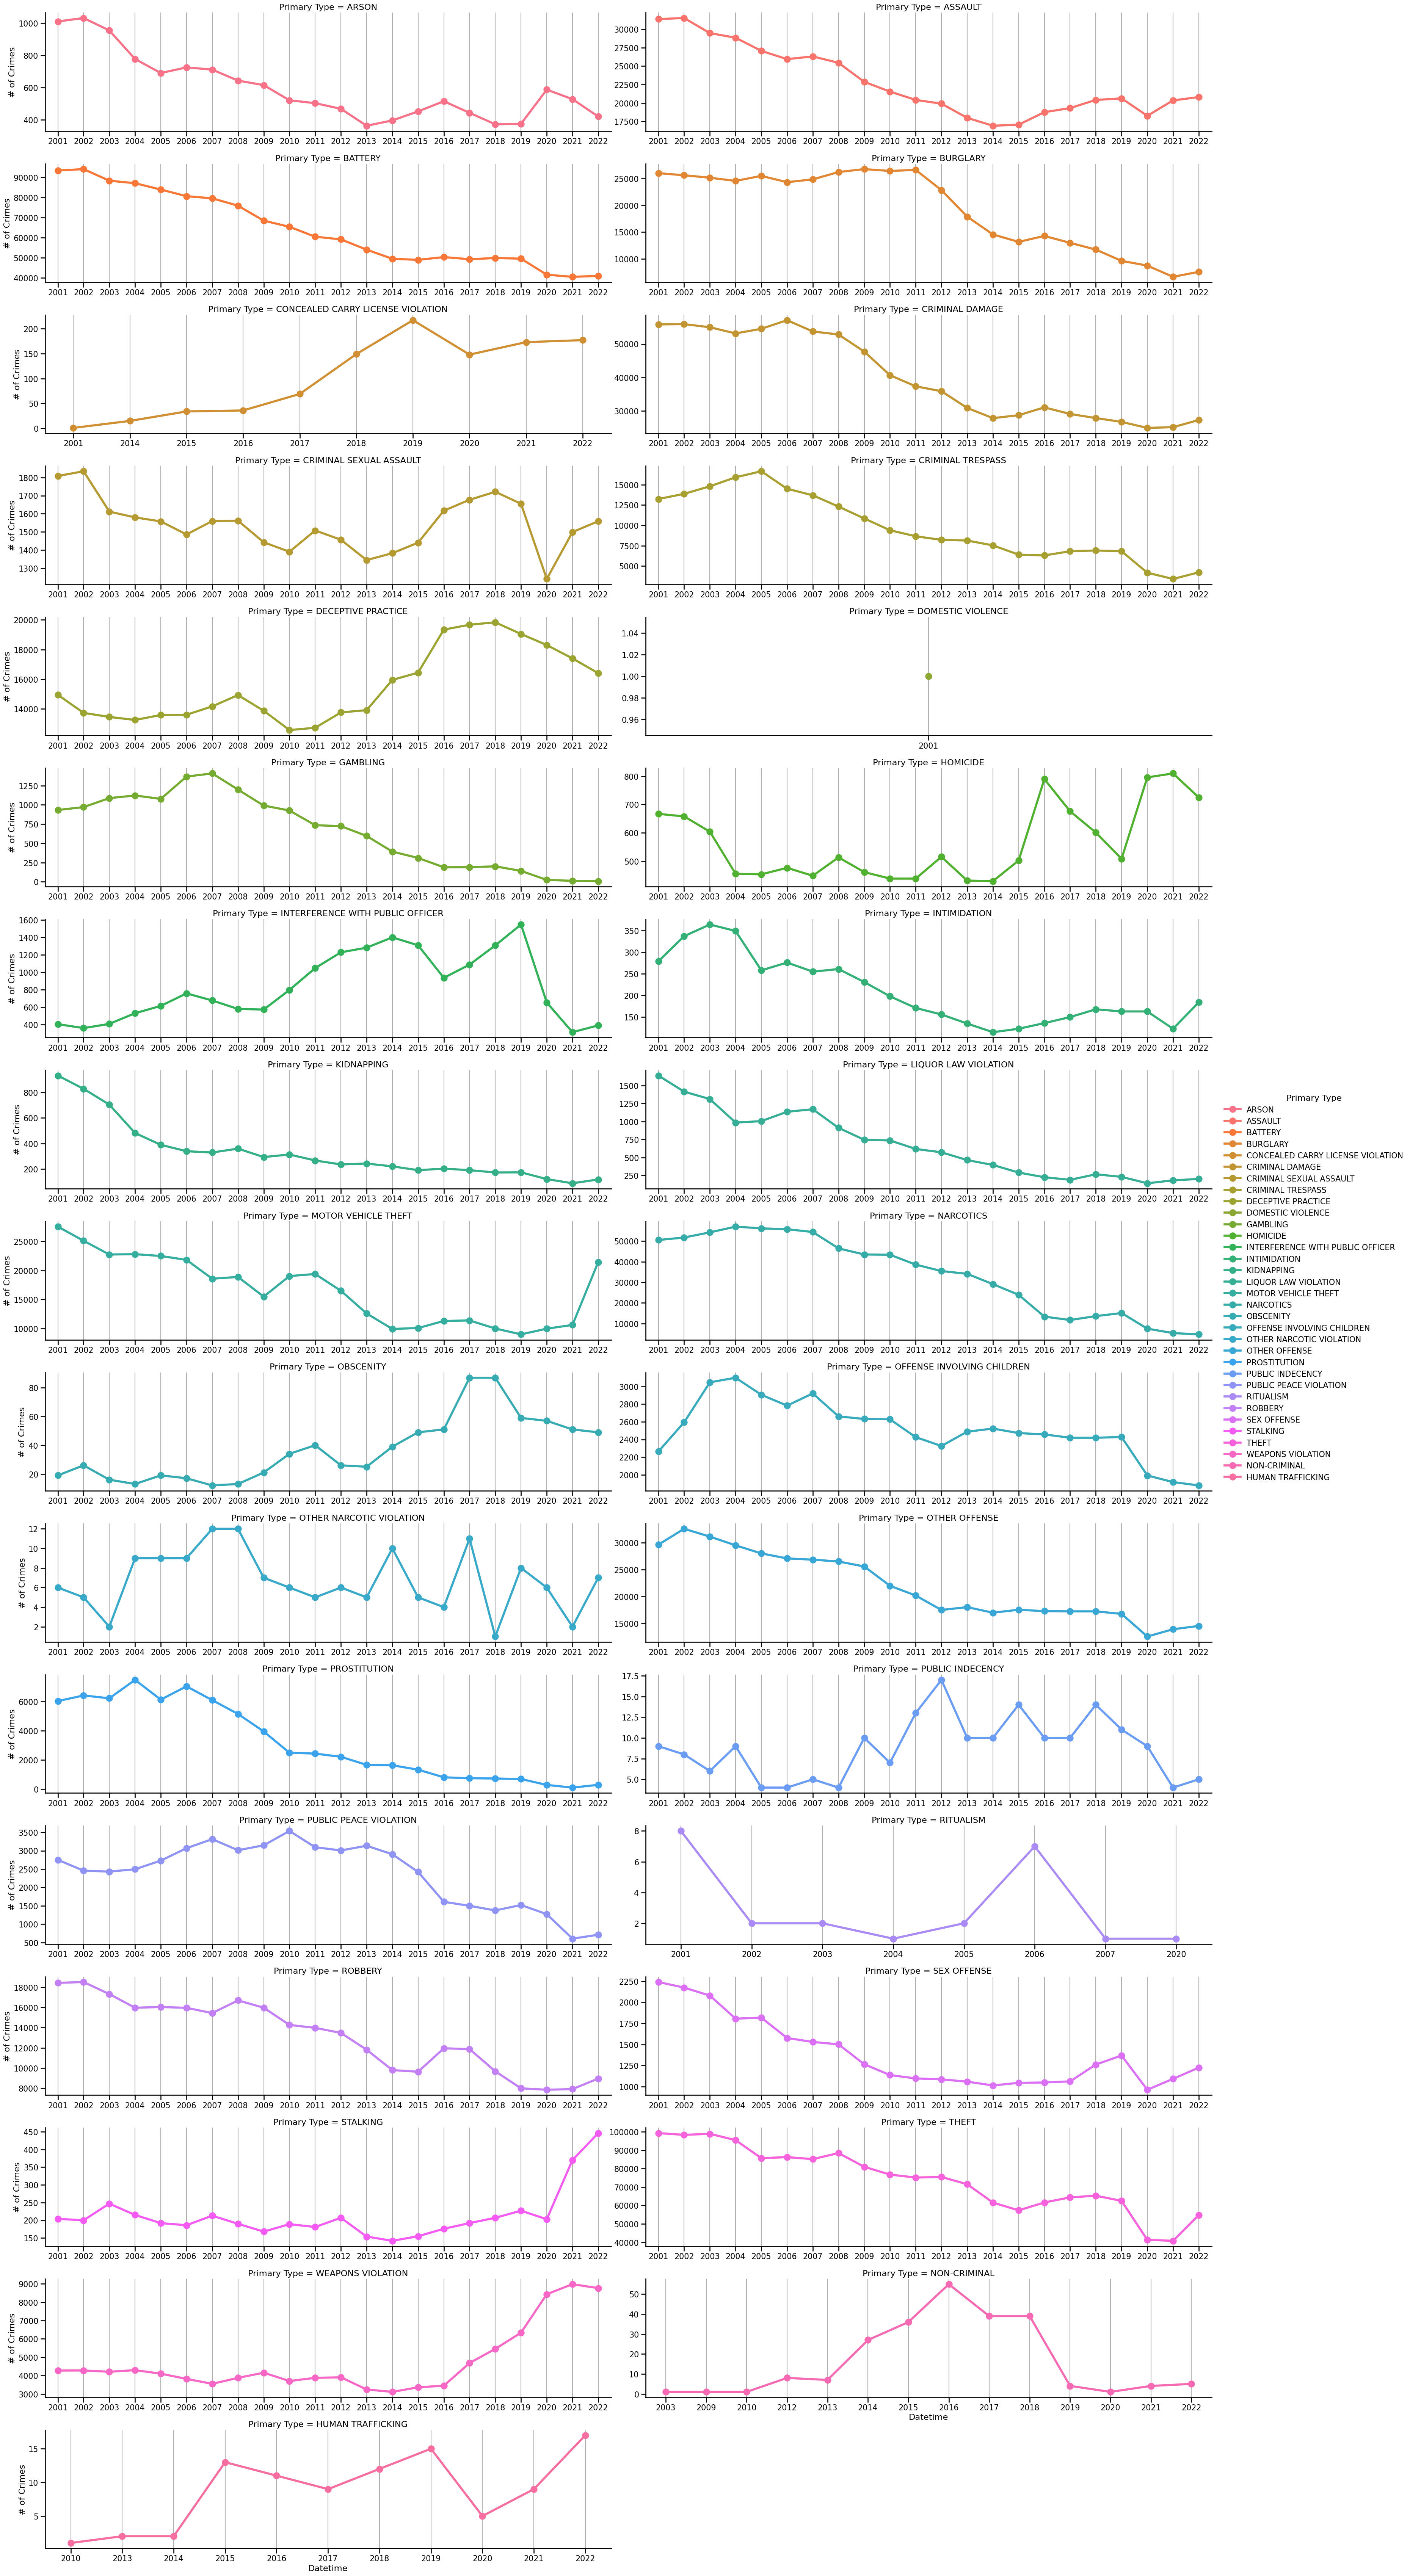

In [ ]:
g = sns.catplot(data=plot_df, x='Datetime', y='# of Crimes',
                kind='point',aspect=4, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];


The following are the crimes that did not have a decrease trend, but an increase or fluctuation:
1. Conceled carry license violation
2. Criminal sexual assault in the end it decreased, but it was fluctuating
3. Deceptive practice
4. Motor vehicle theft, decreased then increased
5. Obscenity
6. Other narcotic violation is fluctuating
7. Stalking increased

8. Weapons violation increased
1. Human trafficking increased
9. Homicide


In [ ]:
# to show the increasing crime plot only
inc_crime = ['CONCEALED CARRY LICENSE VIOLATION	','CRIMINAL SEXUAL ASSAULT','DECEPTIVE PRACTICE'	,'MOTOR VEHICLE THEFT','OBSCENITY','OTHER NARCOTIC VIOLATION','STALKING','WEAPONS VIOLATION	','HUMAN TRAFFICKING','HOMICIDE']
inc_crime_df = plot_df[plot_df['Primary Type'].isin(inc_crime)]
inc_crime_df


Datetime              Primary Type  # of Crimes
6        2001   CRIMINAL SEXUAL ASSAULT         1808
8        2001        DECEPTIVE PRACTICE        14949
11       2001                  HOMICIDE          667
16       2001       MOTOR VEHICLE THEFT        27553
18       2001                 OBSCENITY           19
..        ...                       ...          ...
640      2022         HUMAN TRAFFICKING           17
645      2022       MOTOR VEHICLE THEFT        21449
648      2022                 OBSCENITY           49
650      2022  OTHER NARCOTIC VIOLATION            7
657      2022                  STALKING          446

[165 rows x 3 columns]

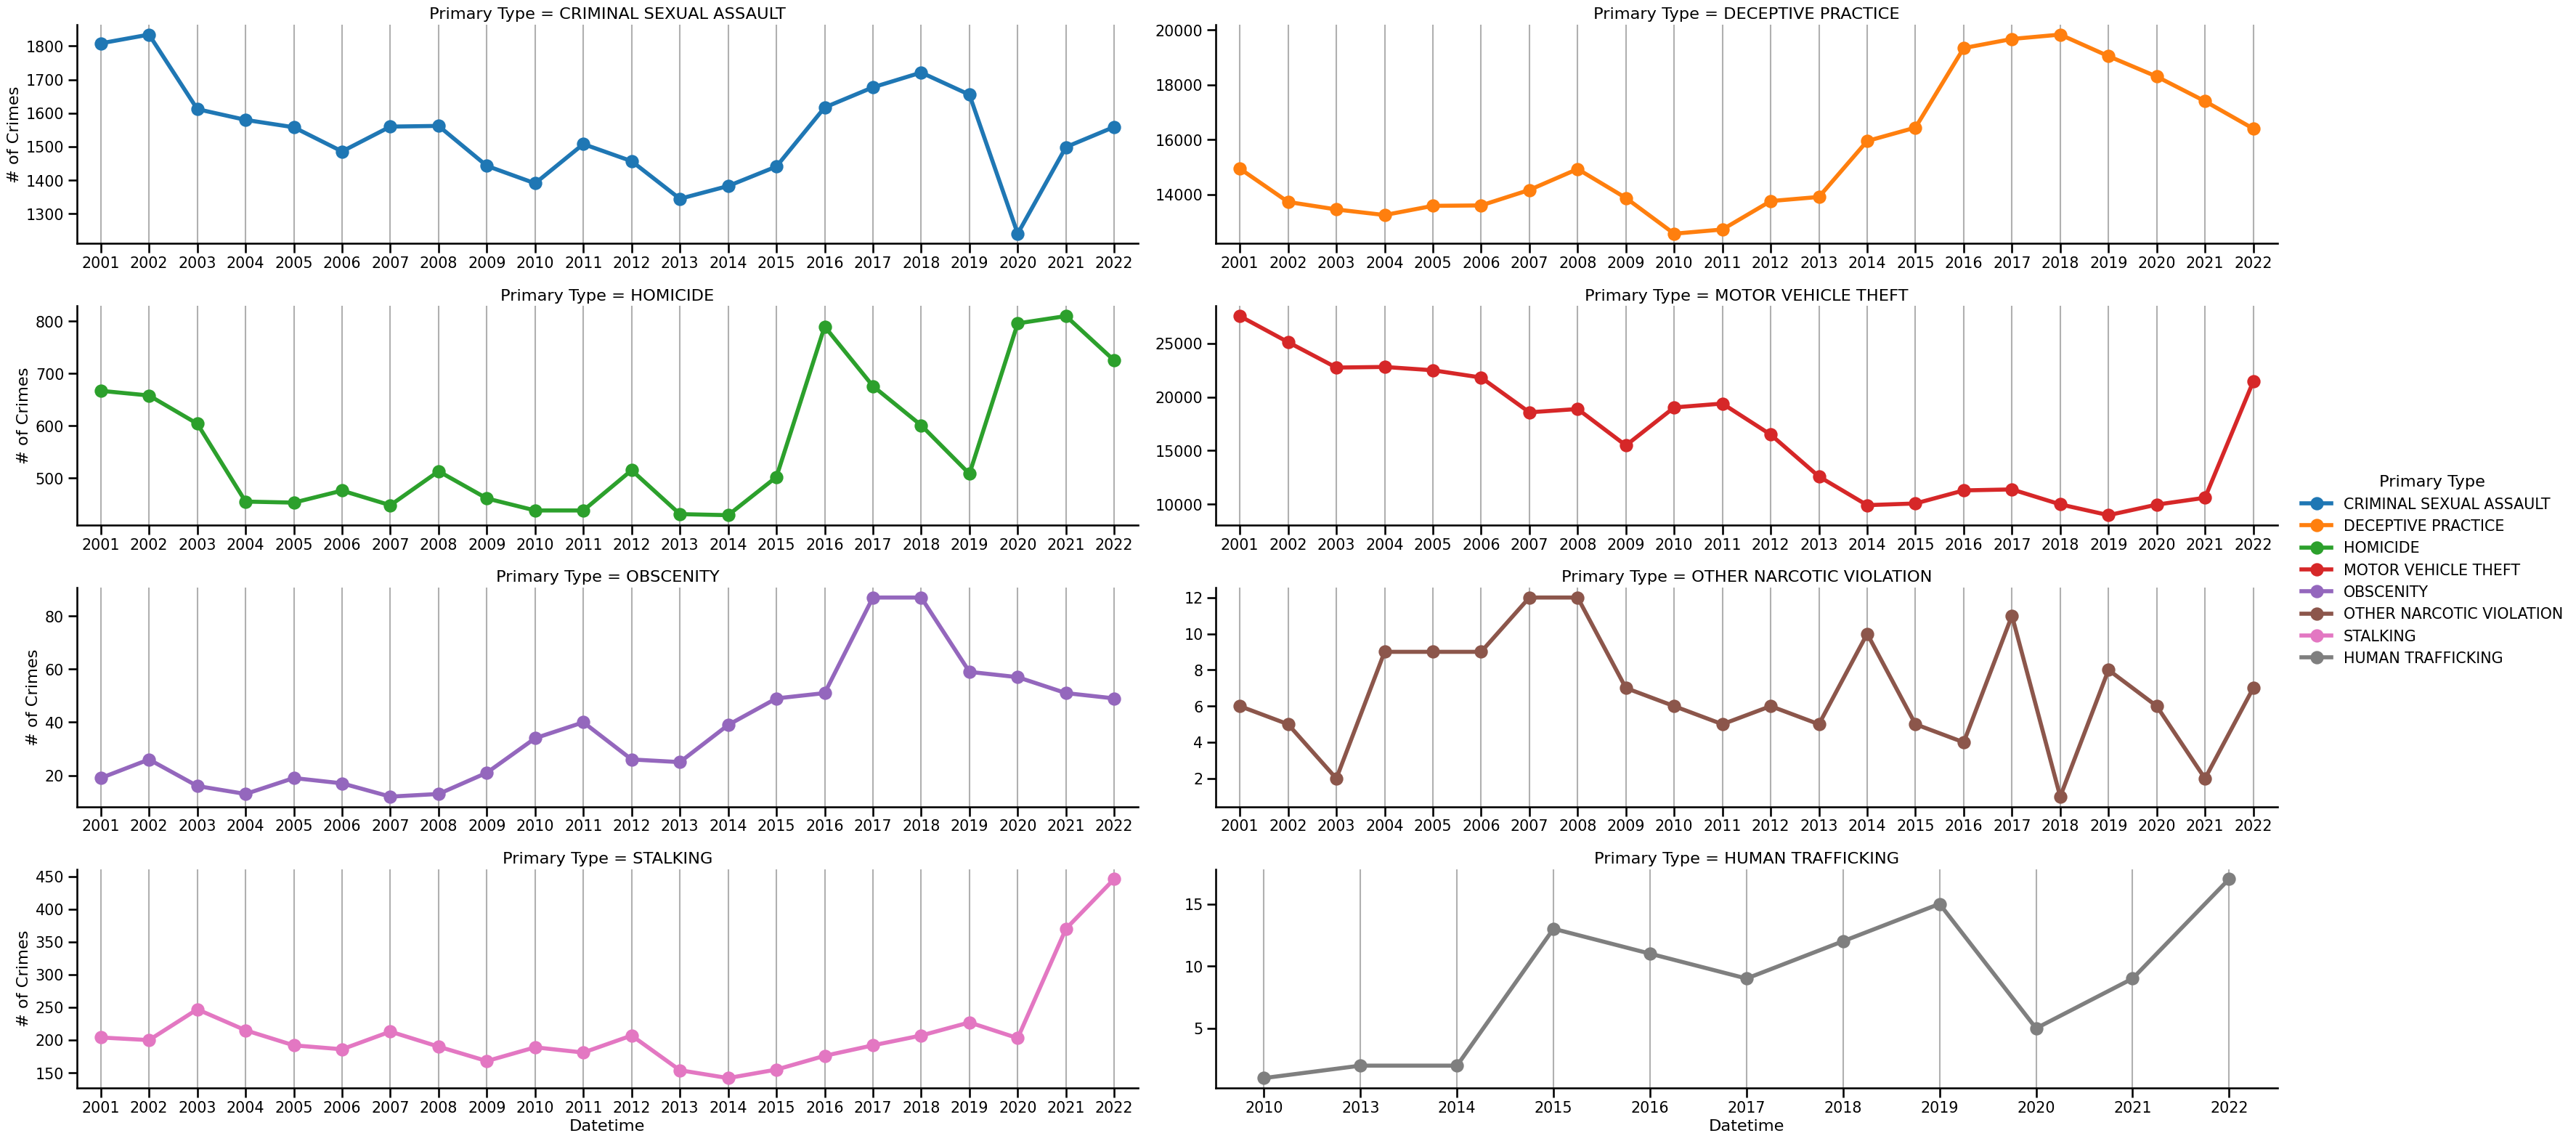

In [ ]:
g = sns.catplot(data=inc_crime_df, x='Datetime', y='# of Crimes',
                kind='point',aspect=4, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

---
---

## Topic 4) Comparing Months:


Answer the question: What months have the most crime? What months have the least?

In [ ]:
crimes_by_month = df.groupby(df.index.month)['Primary Type'].value_counts().sort_index()
crimes_by_month

Datetime  Primary Type                     
1         ARSON                                   917
          ASSAULT                               34818
          BATTERY                              101302
          BURGLARY                              32639
          CONCEALED CARRY LICENSE VIOLATION        62
                                                ...  
12        ROBBERY                               25749
          SEX OFFENSE                            1919
          STALKING                                332
          THEFT                                126644
          WEAPONS VIOLATION                      7401
Name: count, Length: 384, dtype: int64

In [ ]:
## convert to dataframe and reset_index()
plot_df_m = crimes_by_month.to_frame('# of Crimes').reset_index()
plot_df_m


Datetime                       Primary Type  # of Crimes
0           1                              ARSON          917
1           1                            ASSAULT        34818
2           1                            BATTERY       101302
3           1                           BURGLARY        32639
4           1  CONCEALED CARRY LICENSE VIOLATION           62
..        ...                                ...          ...
379        12                            ROBBERY        25749
380        12                        SEX OFFENSE         1919
381        12                           STALKING          332
382        12                              THEFT       126644
383        12                  WEAPONS VIOLATION         7401

[384 rows x 3 columns]

In [ ]:
# to group by datetime and value count the # of crimes
plot_df_m= plot_df_m.groupby('Datetime')['# of Crimes'].sum()
plot_df_m


Datetime
1     601236
2     529391
3     629704
4     627175
5     682932
6     681739
7     717232
8     710444
9     668242
10    676285
11    608961
12    579768
Name: # of Crimes, dtype: int64

In [ ]:
# to change date time from numbers to name of months
plot_df_m.index

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='Datetime')

In [ ]:
# to change date time from numbers to name of months
import calendar
plot_df_m.index = plot_df_m.index.map(lambda x: calendar.month_name[x])

Text(0.5, 0, 'Month')

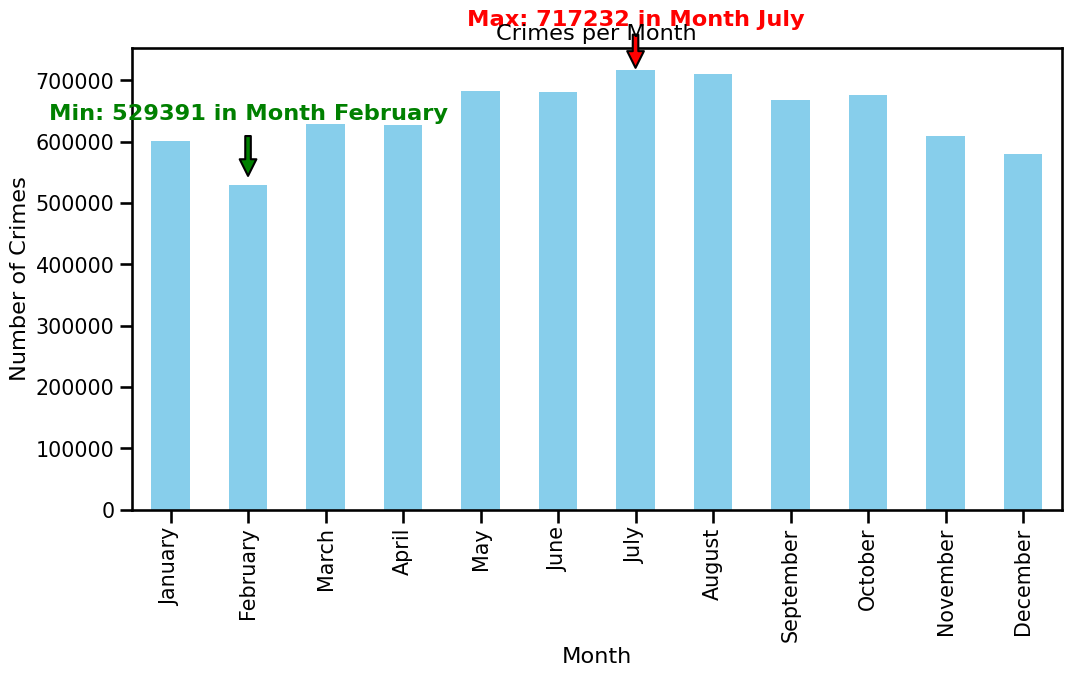

In [ ]:
# Bar plot for crimes per district
ax =plot_df_m.plot(kind='bar', figsize=(12,6), title="Crimes per Month",color = "Skyblue")
#to annotate the number of max crimes over
max_month = plot_df_m.idxmax()
max_value = plot_df_m.max()

min_month = plot_df_m.idxmin()
min_value = plot_df_m.min()

# Annotate the max value
ax.annotate(f'Max: {max_value} in Month {max_month}',
            xy=(plot_df_m.index.get_loc(max_month), max_value),
            xytext=(plot_df_m.index.get_loc(max_month), max_value + max_value*0.1),
            arrowprops=dict(facecolor='red', shrink=0.05),
            ha='center', color='red', fontweight='bold')

# Annotate min with an arrow
ax.annotate(f'Min: {min_value} in Month {min_month}',
            xy=(plot_df_m.index.get_loc(min_month), min_value),
            xytext=(plot_df_m.index.get_loc(min_month), min_value + min_value*0.2),
            arrowprops=dict(facecolor='green', shrink=0.15),
            ha='center', color='green', fontweight='bold')

# Add labels and title
ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Month')

Highest number of crimes were

In [ ]:
print(f'The lowest number of crimes was : {min_value} during {min_month}',"while the highest number of crimes was : ",max_value,"during",max_month)

The lowest number of crimes was : 529391 during February while the highest number of crimes was :  717232 during July


In [ ]:
crimes_by_month = df.groupby(df.index.month)['Primary Type'].value_counts().sort_index()
crimes_by_month

Datetime  Primary Type                     
1         ARSON                                   917
          ASSAULT                               34818
          BATTERY                              101302
          BURGLARY                              32639
          CONCEALED CARRY LICENSE VIOLATION        62
                                                ...  
12        ROBBERY                               25749
          SEX OFFENSE                            1919
          STALKING                                332
          THEFT                                126644
          WEAPONS VIOLATION                      7401
Name: count, Length: 384, dtype: int64

In [ ]:
crimes_by_month= crimes_by_month.to_frame('# of Crimes').reset_index()
crimes_by_month

Datetime                       Primary Type  # of Crimes
0           1                              ARSON          917
1           1                            ASSAULT        34818
2           1                            BATTERY       101302
3           1                           BURGLARY        32639
4           1  CONCEALED CARRY LICENSE VIOLATION           62
..        ...                                ...          ...
379        12                            ROBBERY        25749
380        12                        SEX OFFENSE         1919
381        12                           STALKING          332
382        12                              THEFT       126644
383        12                  WEAPONS VIOLATION         7401

[384 rows x 3 columns]

In [ ]:
# to add month column to crimes_by_month
import calendar
crimes_by_month['Month'] = crimes_by_month['Datetime'].map(lambda x: calendar.month_name[x])
crimes_by_month

Datetime                       Primary Type  # of Crimes     Month
0           1                              ARSON          917   January
1           1                            ASSAULT        34818   January
2           1                            BATTERY       101302   January
3           1                           BURGLARY        32639   January
4           1  CONCEALED CARRY LICENSE VIOLATION           62   January
..        ...                                ...          ...       ...
379        12                            ROBBERY        25749  December
380        12                        SEX OFFENSE         1919  December
381        12                           STALKING          332  December
382        12                              THEFT       126644  December
383        12                  WEAPONS VIOLATION         7401  December

[384 rows x 4 columns]

In [ ]:
# looping through the value counts series
val_counts_by_month = crimes_by_month.groupby('Primary Type')['Month'].value_counts()
val_counts_by_month


Primary Type       Month    
ARSON              April        1
                   August       1
                   December     1
                   February     1
                   January      1
                               ..
WEAPONS VIOLATION  March        1
                   May          1
                   November     1
                   October      1
                   September    1
Name: count, Length: 384, dtype: int64

In [ ]:
crime_list = val_counts_by_month.index.levels[0]
crime_list


Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIMINAL DAMAGE',
       'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
       'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON-CRIMINAL', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN',
       'OTHER NARCOTIC VIOLATION', 'OTHER OFFENSE', 'PROSTITUTION',
       'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY',
       'SEX OFFENSE', 'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type')

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


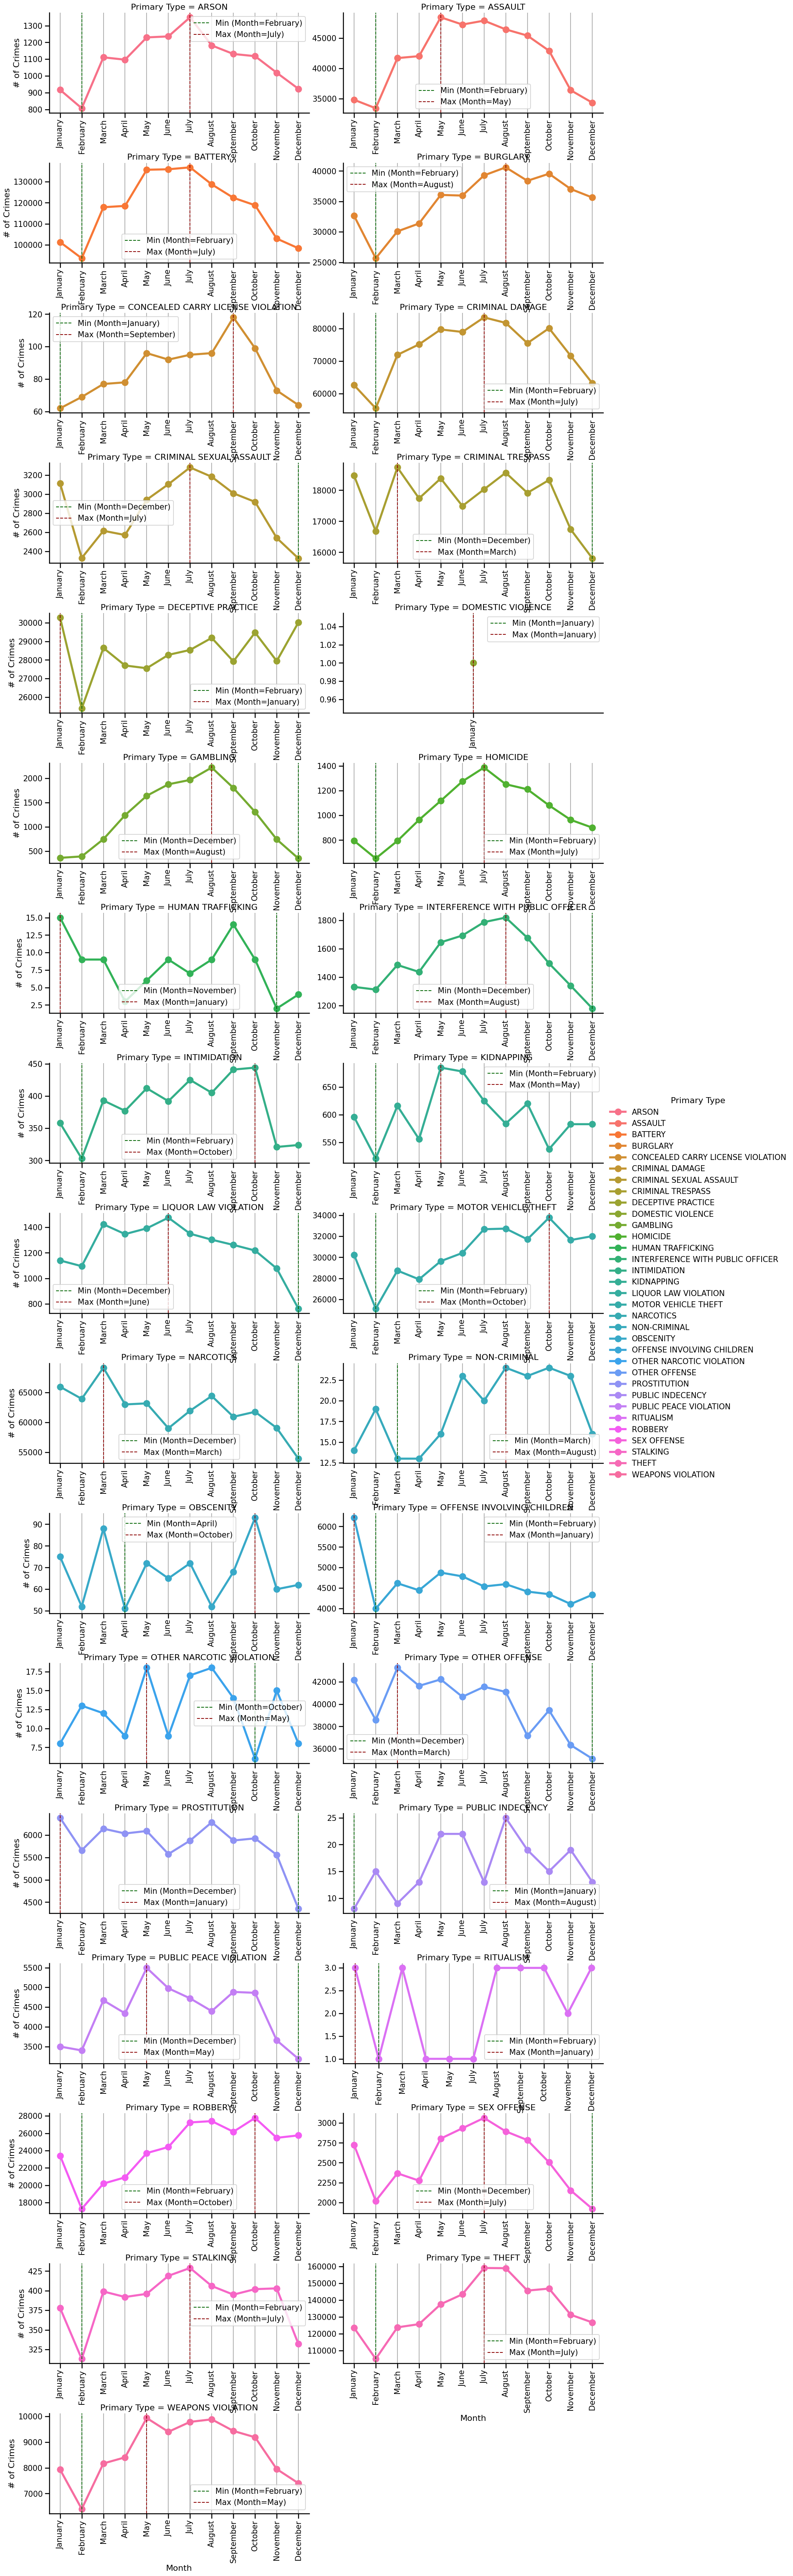

In [ ]:
g = sns.catplot(
    data=crimes_by_month,
    x='Month',
    y='# of Crimes',
    hue='Primary Type',
    col='Primary Type',
    col_wrap=2,
    kind='point',
    aspect=2,
    height=4,
    sharey=False,
    sharex=False
)

# Loop through each subplot
for col, ax in g.axes_dict.items():
    # Filter data for this crime type
    df_crime = crimes_by_month[crimes_by_month['Primary Type'] == col]

    # Find max and min month
    min_row = df_crime.loc[df_crime['# of Crimes'].idxmin()]
    max_row = df_crime.loc[df_crime['# of Crimes'].idxmax()]

    # Add dashed vertical lines
    ln1 = ax.axvline(x=min_row['Month'], color='darkgreen', linestyle='--', lw=1.5)
    ln2 = ax.axvline(x=max_row['Month'], color='darkred', linestyle='--', lw=1.5)

    # Add legend for min/max
    ax.legend([ln1, ln2], [f'Min (Month={min_row["Month"]})', f'Max (Month={max_row["Month"]})'])

    # Rotate x-axis and add grid
    ax.tick_params(axis='x', rotation=90)
    ax.grid(axis='x')

plt.subplots_adjust(hspace=0.5)
plt.show()